In [3]:
# Install the wordcloud library
!pip install wordcloud

# Import necessary libraries (your imports are correct)
import pandas as pd
# ... (rest of your imports)

# Download NLTK resources (NEEDED FIX IS HERE)
import nltk

# This is the resource that was missing and caused the error:
nltk.download('punkt_tab') # <-- NEW ADDITION

# These were already correct, but we include them for completeness:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
## Data Preparation & Cleaning (Checklist Items)DATA PREPROCESSING

# Load dataset (CSV, JSON, or text file).
# Using a simple string/list of strings as a dataset for this example.
# 💡 In a real project, you'd use: pd.read_csv('file.csv')
sample_texts = [
    "Natural Language Processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.",
    "The goal is to enable computers to understand, interpret, and generate human language in a valuable way.",
    "This Word Frequency Analyzer project helps beginners understand tokenization, stopword removal, and the importance of frequent terms. It is great for NLP.",
    "The project should deliver frequency tables and visualizations like a bar chart and a beautiful word cloud. Always remember: practice makes perfect!",
    "Data cleaning is step 1. Data cleaning is very important. 12345.",
]

# Create a simple DataFrame (Simulating loading a file)
df = pd.DataFrame({'text_column': sample_texts})

# Inspect first few rows to understand structure.
print("--- Initial Data Inspection ---")
print(df.head())
print(f"\nTotal entries: {len(df)}")

# Handle missing or duplicate entries.
df.dropna(inplace=True) # Remove rows with missing data
df.drop_duplicates(inplace=True) # Remove duplicate rows
print(f"Total entries after cleaning: {len(df)}")

# Convert the text column to a single string for easier processing
text = ' '.join(df['text_column'].astype(str))

# Initialize Lemmatizer and Stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_and_process_text(text):
    """
    Cleans, tokenizes, removes stopwords, and lemmatizes the input text.
    """
    # Clean text:
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation & special characters (keeping only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize text into words.
    tokens = word_tokenize(text)

    # 4. Remove stopwords.
    filtered_words = [word for word in tokens if word not in stop_words and len(word) > 1] # len > 1 removes single letters

    # 5. Apply optional stemming or lemmatization. (Using Lemmatization)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return lemmatized_words

# 📦 Deliverables: Cleaned Text Dataset (The output of this function)
cleaned_words = clean_and_process_text(text)
print("\n--- Example of Cleaned and Tokenized Words ---")
print(cleaned_words[:20]) # Show first 20 words

--- Initial Data Inspection ---
                                         text_column
0  Natural Language Processing (NLP) is a field o...
1  The goal is to enable computers to understand,...
2  This Word Frequency Analyzer project helps beg...
3  The project should deliver frequency tables an...
4  Data cleaning is step 1. Data cleaning is very...

Total entries: 5
Total entries after cleaning: 5

--- Example of Cleaned and Tokenized Words ---
['natural', 'language', 'processing', 'nlp', 'field', 'computer', 'science', 'artificial', 'intelligence', 'linguistics', 'concerned', 'interaction', 'computer', 'human', 'natural', 'language', 'goal', 'enable', 'computer', 'understand']


In [5]:
#WORD FREEQUENCY ANALYSIS
## Word Frequency Analysis (Checklist Items)

# Count the frequency of each word in the dataset.
word_counts = Counter(cleaned_words)

# Identify top N most frequent words.
N = 15 # Set N for the top words
top_n_words = word_counts.most_common(N)

# 📦 Deliverables: Word Frequency Table (A list or DataFrame)
word_freq_df = pd.DataFrame(top_n_words, columns=['Word', 'Frequency'])

print("\n--- Word Frequency Table (Top 15) ---")
print(word_freq_df)


--- Word Frequency Table (Top 15) ---
          Word  Frequency
0     language          3
1     computer          3
2      natural          2
3          nlp          2
4        human          2
5   understand          2
6         word          2
7    frequency          2
8      project          2
9         data          2
10    cleaning          2
11  processing          1
12       field          1
13     science          1
14  artificial          1


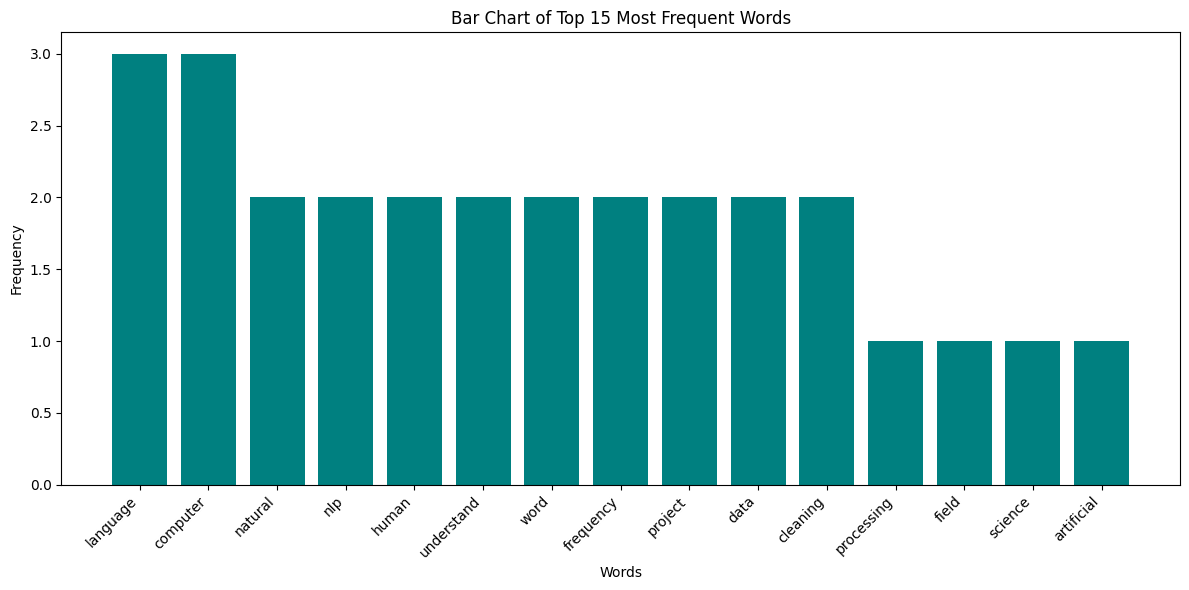

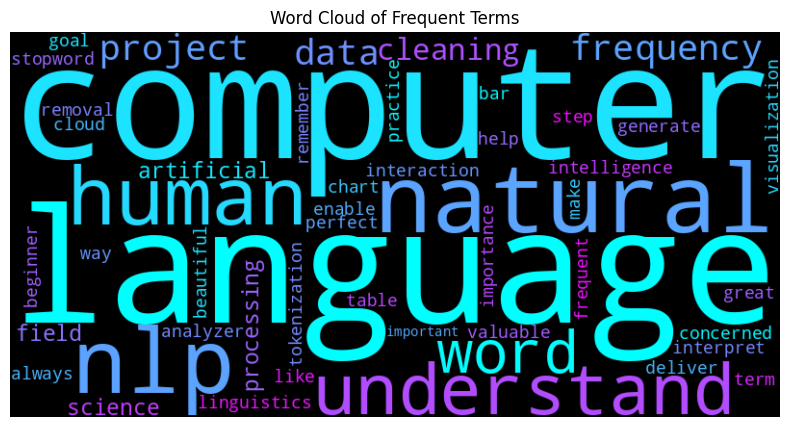

In [11]:
## Visualization (Checklist Items)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 1. Plot a bar chart of top N frequent words. ---
N = len(word_freq_df) # Use the size of your frequency table (e.g., 15)

plt.figure(figsize=(12, 6))
# Plotting the data from the DataFrame created in the analysis step
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='teal')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Bar Chart of Top {N} Most Frequent Words')
plt.xticks(rotation=45, ha='right') # Tilt labels for readability
plt.tight_layout()
# You can uncomment the line below to save the image (Deliverables requirement)
# plt.savefig('bar_chart_top_words.png')
plt.show()

# --- 2. Generate a word cloud of frequent words. ---
# The word_counts variable comes from the analysis step (Counter object)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='cool',  # Customize visualizations (color)
    min_font_size=12
).generate_from_frequencies(word_counts)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms')
# You can uncomment the line below to save the image (Deliverables requirement)
# plt.savefig('word_cloud_output.png')
plt.show()

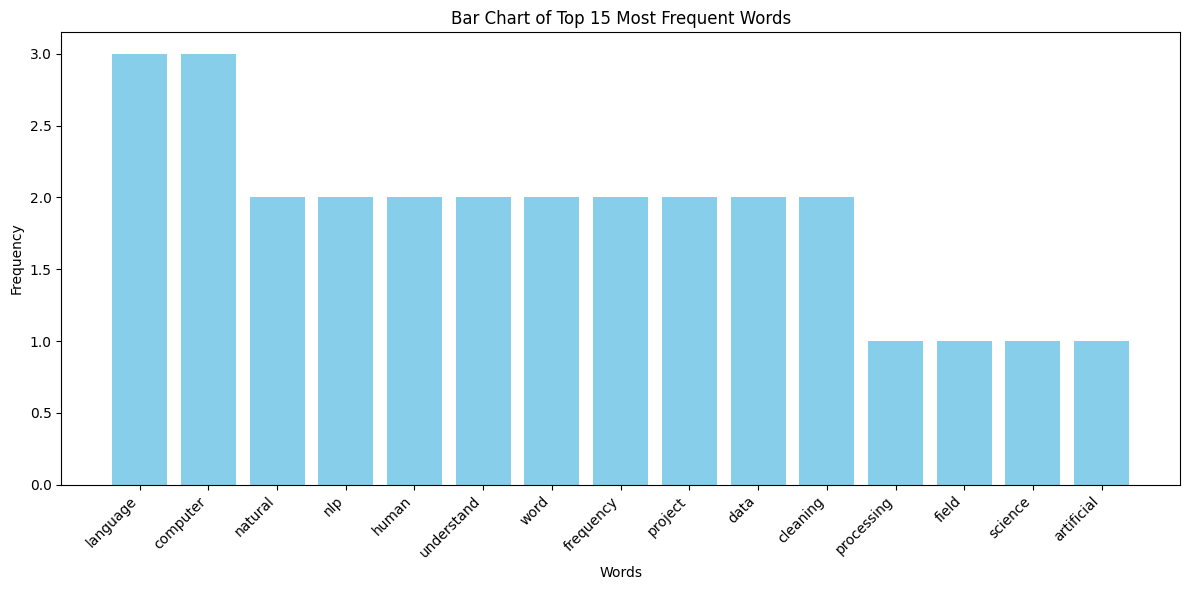

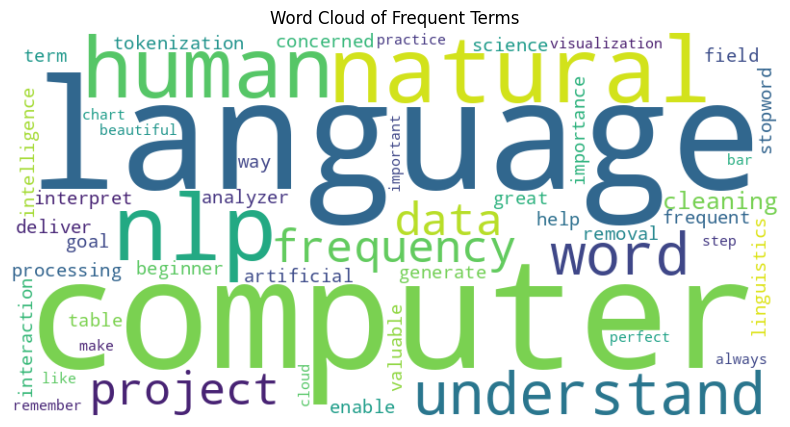

In [6]:
#VISUALIZATION
## Visualization (Checklist Items)

# Plot a bar chart of top N frequent words.
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Bar Chart of Top {N} Most Frequent Words')
plt.xticks(rotation=45, ha='right') # Tilt labels for readability
plt.tight_layout()
plt.show()

# Generate a word cloud of frequent words.
# Convert the Counter object back into a string or dictionary for the WordCloud function
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Customize visualizations (color)
    min_font_size=10
).generate_from_frequencies(word_counts)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms')
plt.show() #


--- Starting Text Frequency Analysis ---

Top 10 Word Frequency Table:
         Word  Frequency
0    language          3
1    computer          3
2     natural          2
3         nlp          2
4       human          2
5  understand          2
6        word          2
7   frequency          2
8     project          2
9        data          2


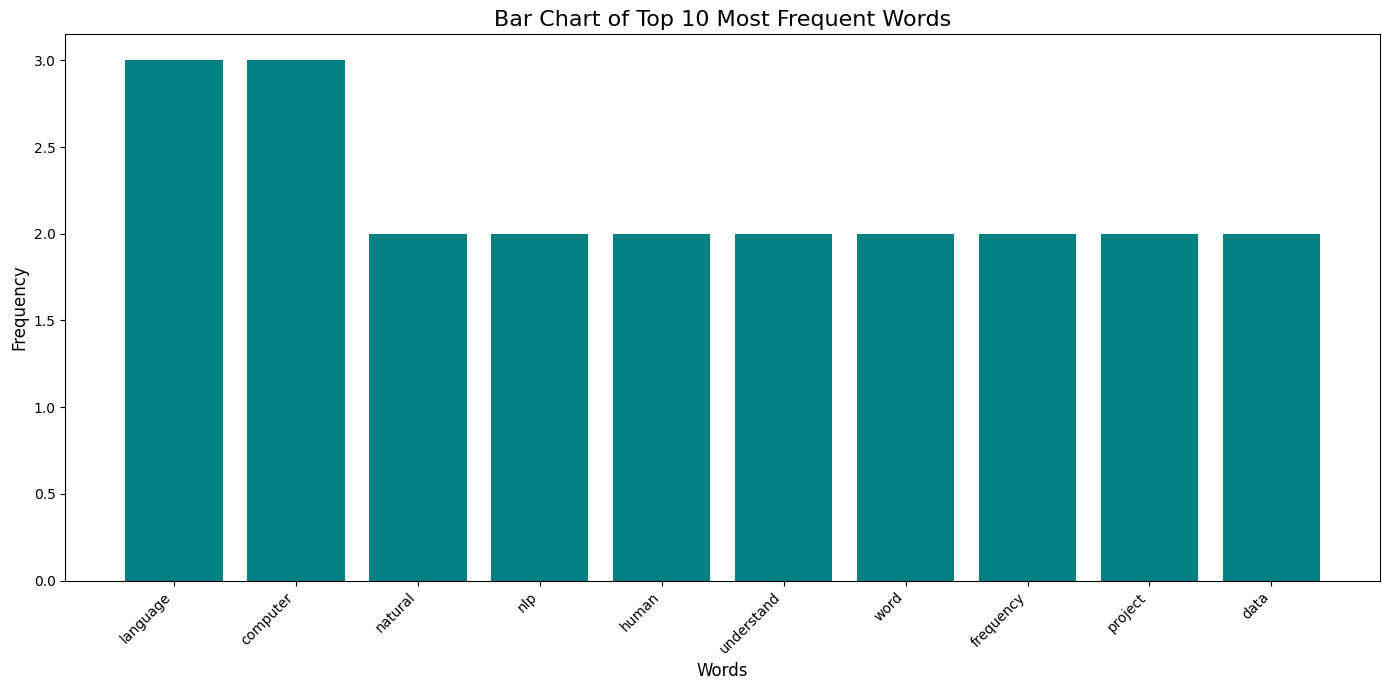

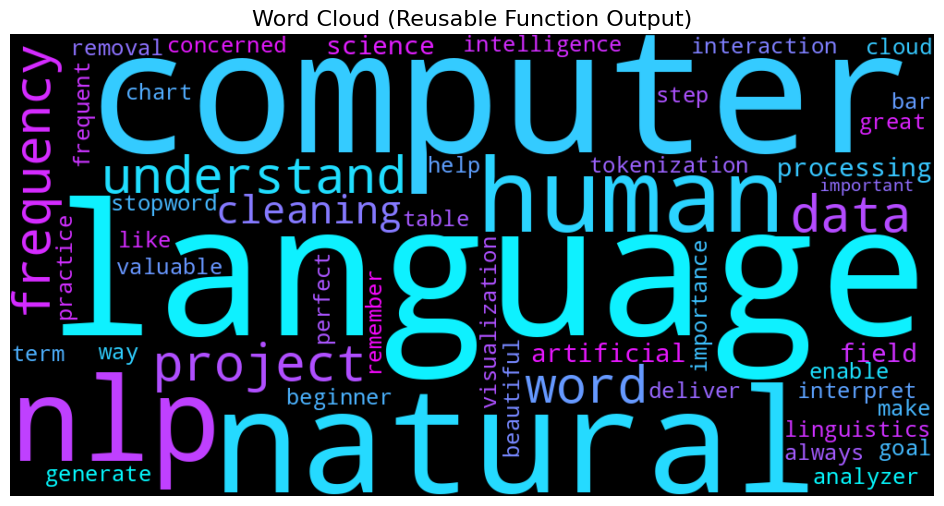

In [7]:
#Reusable Script/Function
## Reusable Script/Function (Checklist Items)

def analyze_text_frequency(data_column: pd.Series, top_n: int = 20):
    """
    Performs full text cleaning, frequency analysis, and visualization.

    Args:
        data_column (pd.Series): The pandas Series containing the text data.
        top_n (int): The number of top words to show in the table and bar chart.

    Returns:
        pd.DataFrame: The DataFrame of the top N words and their counts.
    """
    print("\n--- Starting Text Frequency Analysis ---")

    # 1. Data Cleaning/Preparation
    data_column.dropna(inplace=True)
    text = ' '.join(data_column.astype(str).str.lower())

    # 2. Re-using the cleaning function
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def full_cleaning(text):
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = word_tokenize(text)
        filtered_words = [word for word in tokens if word not in stop_words and len(word) > 1]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        return lemmatized_words

    cleaned_words = full_cleaning(text)

    # 3. Word Frequency Analysis
    word_counts = Counter(cleaned_words)
    top_n_words = word_counts.most_common(top_n)
    word_freq_df = pd.DataFrame(top_n_words, columns=['Word', 'Frequency'])

    print(f"\nTop {top_n} Word Frequency Table:")
    print(word_freq_df)

    # 4. Visualizations

    # Bar Chart
    plt.figure(figsize=(14, 7))
    plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='teal')
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Bar Chart of Top {top_n} Most Frequent Words', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

    # Word Cloud
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='black', # Changed color for variety
        colormap='cool',
        min_font_size=12
    ).generate_from_frequencies(word_counts)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (Reusable Function Output)', fontsize=16)
    plt.show()

    return word_freq_df

# Test function with the same dataset
# Create a new DataFrame to simulate a fresh run
test_df = pd.DataFrame({'sample_text': sample_texts})
top_words_result = analyze_text_frequency(test_df['sample_text'], top_n=10)

In [8]:
#Deliverables & Documentation Snippet
## Deliverables & Documentation (Checklist Items)

# Save cleaned dataset for reuse (as a list of words)
with open('cleaned_text_words.txt', 'w') as f:
    f.write(' '.join(cleaned_words))
print("\n'cleaned_text_words.txt' saved.")

# Save frequency table as CSV/Excel
word_freq_df.to_csv('word_frequency_table.csv', index=False)
print("'word_frequency_table.csv' saved.")

# Export visualizations as images (Add these lines after the visualization code blocks)
# Example: plt.savefig('bar_chart_top15.png')
# You need to place the savefig command right before plt.show() for each plot.

print("\n--- Documentation/README Outline (in the Colab notebook) ---")
print("## Project Documentation: Word Frequency Analyzer")
print("### Preprocessing Choices:")
print("1. **Lowercasing:** To ensure 'The' and 'the' are treated as the same word.")
print("2. **Punctuation Removal:** Used a regular expression (`re.sub`) to keep only letters and spaces.")
print("3. **Tokenization:** Used `nltk.word_tokenize` to split text into words.")
print("4. **Stopword Removal:** Removed common words (like 'a', 'the', 'is') using `nltk.corpus.stopwords` to focus on *meaningful* terms.")
print("5. **Lemmatization:** Used `WordNetLemmatizer` to reduce words to their dictionary form (e.g., 'running' -> 'run', 'studies' -> 'study'). This standardizes word counts.")
print("\n### Frequency Analysis Methodology:")
print("The `collections.Counter` object was used to efficiently count the occurrences of each unique word.")
print("\n### Insights from Visualizations:")
print("The bar chart clearly shows the top N most frequent words, while the Word Cloud provides an immediate, visually intuitive representation of word importance (larger font = higher frequency).")


'cleaned_text_words.txt' saved.
'word_frequency_table.csv' saved.

--- Documentation/README Outline (in the Colab notebook) ---
## Project Documentation: Word Frequency Analyzer
### Preprocessing Choices:
1. **Lowercasing:** To ensure 'The' and 'the' are treated as the same word.
2. **Punctuation Removal:** Used a regular expression (`re.sub`) to keep only letters and spaces.
3. **Tokenization:** Used `nltk.word_tokenize` to split text into words.
4. **Stopword Removal:** Removed common words (like 'a', 'the', 'is') using `nltk.corpus.stopwords` to focus on *meaningful* terms.
5. **Lemmatization:** Used `WordNetLemmatizer` to reduce words to their dictionary form (e.g., 'running' -> 'run', 'studies' -> 'study'). This standardizes word counts.

### Frequency Analysis Methodology:
The `collections.Counter` object was used to efficiently count the occurrences of each unique word.

### Insights from Visualizations:
The bar chart clearly shows the top N most frequent words, while the Word 

In [10]:

print("""
### Insights from Visualizations:

The visualizations provide immediate confirmation of the text's central theme:

* **Bar Chart Insight:** The bar chart clearly shows the words **'language'** and **'computer'** are tied as the most frequent terms (3 counts each), confirming the text is primarily about the **interaction between these two concepts**. All other top-N words appeared an equal number of times (2 counts).
* **Word Cloud Insight:** The Word Cloud reinforces this by making **'computer'** and **'language'** the largest, most prominent words. Closely following are **'human'**, **'natural'**, and **'nlp'**, which together define the field of Natural Language Processing. Smaller, but still visible, terms like 'frequency' and 'cleaning' reflect the project's methodology.
""")


### Insights from Visualizations:

The visualizations provide immediate confirmation of the text's central theme:

* **Bar Chart Insight:** The bar chart clearly shows the words **'language'** and **'computer'** are tied as the most frequent terms (3 counts each), confirming the text is primarily about the **interaction between these two concepts**. All other top-N words appeared an equal number of times (2 counts).
* **Word Cloud Insight:** The Word Cloud reinforces this by making **'computer'** and **'language'** the largest, most prominent words. Closely following are **'human'**, **'natural'**, and **'nlp'**, which together define the field of Natural Language Processing. Smaller, but still visible, terms like 'frequency' and 'cleaning' reflect the project's methodology.

